In [9]:
import pandas as pd
from sklearn.cross_validation import train_test_split, cross_val_predict
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the Data
train = pd.read_csv('input/train2.csv')
test = pd.read_csv('input/test2.csv')

In [141]:
train[0:40]

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Gender,Port,AgeFill
0,1,0,3,1,0,7.2500,1,0,22.0
1,2,1,1,1,0,71.2833,0,1,38.0
2,3,1,3,0,0,7.9250,0,0,26.0
3,4,1,1,1,0,53.1000,0,0,35.0
4,5,0,3,0,0,8.0500,1,0,35.0
5,6,0,3,0,0,8.4583,1,2,25.0
6,7,0,1,0,0,51.8625,1,0,54.0
7,8,0,3,3,1,21.0750,1,0,2.0
8,9,1,3,0,2,11.1333,0,0,27.0
9,10,1,2,1,0,30.0708,0,1,14.0


In [6]:
# create hold-out set

features = list(train.columns.values)[2::]
X_train, X_test, y_train, y_test = train_test_split(train[features], train['Survived'])

# Data exploration

In [7]:
X_train.groupby(y_train).mean()

,Pclass,SibSp,Parch,Fare,Gender,Port,AgeFill
Survived,,,,,,,
0,2.530120,0.604819,0.33253,21.229055,0.855422,0.301205,29.963855
1,1.936255,0.490040,0.47012,47.821714,0.318725,0.442231,28.053147


In [8]:
X_train.groupby('Port').mean()

,Pclass,SibSp,Parch,Fare,Gender,AgeFill
Port,,,,,,
0,2.349794,0.631687,0.440329,26.554156,0.693416,29.068765
1,1.862903,0.379032,0.290323,58.265627,0.540323,31.330000
2,2.910714,0.357143,0.107143,12.197325,0.553571,26.142857


In [20]:
X_train[['Fare', 'AgeFill']].corr()

,Fare,AgeFill
Fare,1.000000,0.111903
AgeFill,0.111903,1.000000


# Data visualization

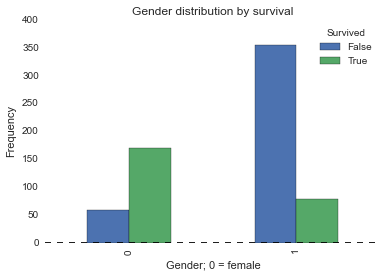

In [29]:
pd.crosstab(X_train.Gender, y_train.astype(bool)).plot(kind='bar')
plt.title('Gender distribution by survival')
plt.xlabel('Gender; 0 = female')
plt.ylabel('Frequency')

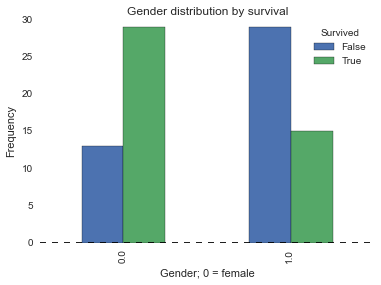

In [30]:
pd.crosstab(X_train.Gender[X_train.AgeFill < 18], y_train.astype(bool)).plot(kind='bar')
plt.title('Gender distribution by survival')
plt.xlabel('Gender; 0 = female')
plt.ylabel('Frequency')

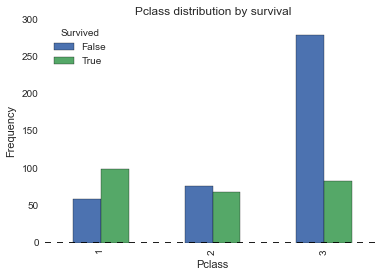

In [31]:
pd.crosstab(X_train.Pclass, y_train.astype(bool)).plot(kind='bar')
plt.title('Pclass distribution by survival')
plt.xlabel('Pclass')
plt.ylabel('Frequency')

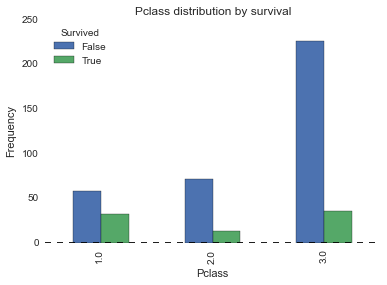

In [70]:
# survival rates of men by class
pd.crosstab(X_train.Pclass[X_train.Gender == 1], y_train.astype(bool)).plot(kind='bar')
plt.title('Pclass distribution by survival')
plt.xlabel('Pclass')
plt.ylabel('Frequency')

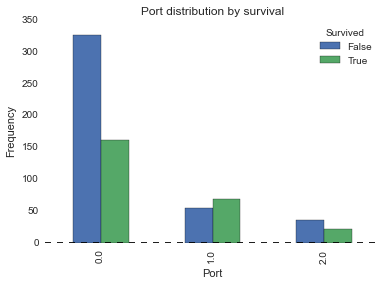

In [33]:
pd.crosstab(X_train.Port, y_train.astype(bool)).plot(kind='bar')
plt.title('Port distribution by survival')
plt.xlabel('Port')
plt.ylabel('Frequency')

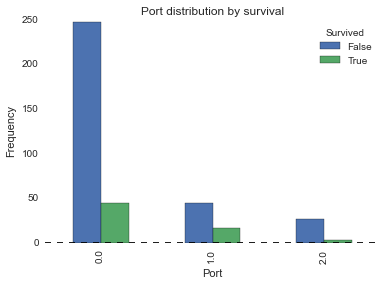

In [94]:
# survival of men by port
pd.crosstab(X_train.Port[(X_train.AgeFill > 18) & (X_train.Gender == 1)], y_train.astype(bool)).plot(kind='bar')
plt.title('Port distribution by survival')
plt.xlabel('Port')
plt.ylabel('Frequency')

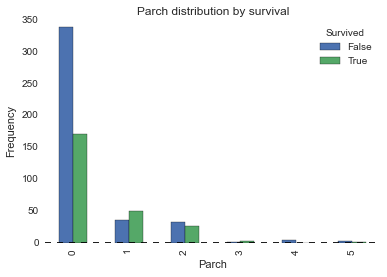

In [35]:
pd.crosstab(X_train.Parch, y_train.astype(bool)).plot(kind='bar')
plt.title('Parch distribution by survival')
plt.xlabel('Parch')
plt.ylabel('Frequency')

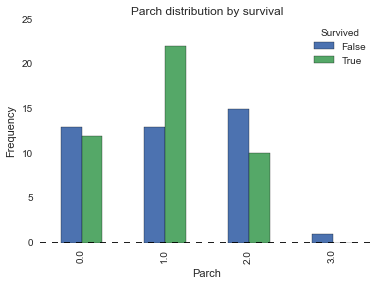

In [36]:
# survival of children by number of parents (because unlikely they have children)
pd.crosstab(X_train.Parch[X_train.AgeFill < 18], y_train.astype(bool)).plot(kind='bar')
plt.title('Parch distribution by survival')
plt.xlabel('Parch')
plt.ylabel('Frequency')

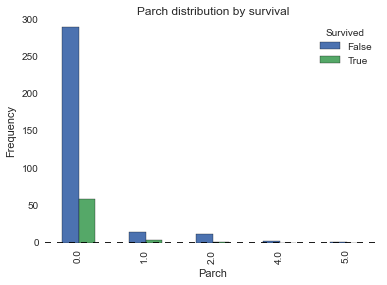

In [116]:
# survival of men by number of children (because unlikely they have parents)
pd.crosstab(X_train.Parch[(X_train.AgeFill > 18) & (X_train.Gender == 1)], y_train.astype(bool)).plot(kind='bar')
plt.title('Parch distribution by survival')
plt.xlabel('Parch')
plt.ylabel('Frequency')

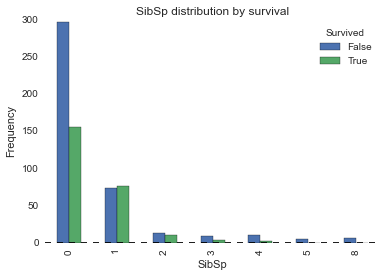

In [37]:
pd.crosstab(X_train.SibSp, y_train.astype(bool)).plot(kind='bar')
plt.title('SibSp distribution by survival')
plt.xlabel('SibSp')
plt.ylabel('Frequency')

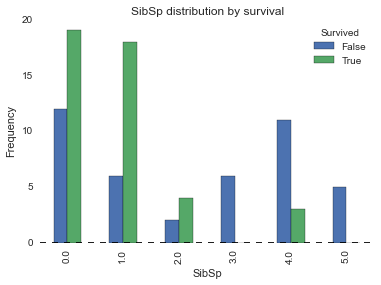

In [38]:
# survival of children by # of siblings (because unlikely they have spouses)
pd.crosstab(X_train.SibSp[X_train.AgeFill < 18], y_train.astype(bool)).plot(kind='bar')
plt.title('SibSp distribution by survival')
plt.xlabel('SibSp')
plt.ylabel('Frequency')

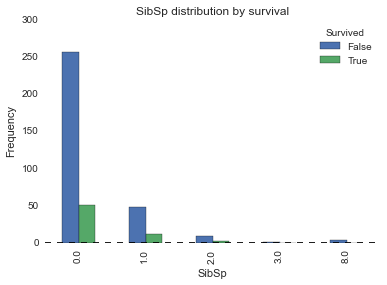

In [115]:
# survival of men by # of spouses (or siblings)
pd.crosstab(X_train.SibSp[(X_train.AgeFill > 18) & (X_train.Gender == 1)], y_train.astype(bool)).plot(kind='bar')
plt.title('SibSp distribution by survival')
plt.xlabel('SibSp')
plt.ylabel('Frequency')

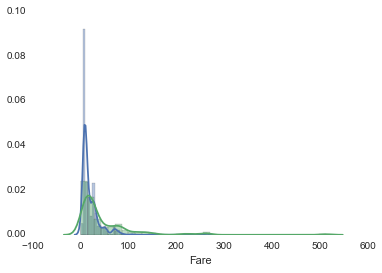

In [13]:
sns.distplot(X_train['Fare'][y_train == 0]) # blue
sns.distplot(X_train['Fare'][y_train == 1]) # green

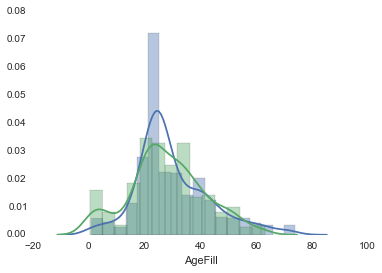

In [14]:
sns.distplot(X_train['AgeFill'][y_train == 0]) # blue
sns.distplot(X_train['AgeFill'][y_train == 1]) # green

In [117]:
X_train[(X_train['AgeFill'] > 18) & (X_train['Pclass'] < 2) & (X_train['Port'] == 1)] 

,Pclass,SibSp,Parch,Fare,Gender,Port,AgeFill
640,1,0,0,69.3000,0,1,24
580,1,1,1,110.8833,0,1,39
555,1,1,0,39.6000,0,1,48
536,1,0,0,106.4250,0,1,30
63,1,0,0,27.7208,1,1,40
792,1,0,0,30.6958,1,1,40
680,1,0,0,76.7292,1,1,27
603,1,0,0,26.5500,1,1,35
556,1,0,0,227.5250,1,1,40
95,1,0,0,34.6542,1,1,71


In [147]:
# men who are in first class and embarqued at port 1 have a survival rate of 42.8% [age, pclass, port, gender]
lst = y_train[(X_train['AgeFill'] > 18) & (X_train['Pclass'] < 2)  & (X_train['Gender'] == 1) & (X_train['Port'] == 1)\
             & (X_train['AgeFill'] < 63)]
sum(lst)/len(lst)

0.46153846153846156

In [126]:
# children younger than 18 in the first or second class predominantly survive
lst = y_train[(X_train['AgeFill'] < 18) & (X_train['Pclass'] < 3)] 
sum(lst)/len(lst)

0.95833333333333337

In [127]:
# mother's with one child in first or second class predominantly survived
lst = y_train[(X_train['AgeFill'] > 18) & (X_train['Parch'] == 1) & (X_train['Pclass'] < 3) & (X_train['Gender'] == 0)] 
sum(lst)/len(lst)

0.95238095238095233